In [1]:
import numpy
import xarray
import matplotlib.pyplot as mp
import glob
import pandas
import cartopy
import itertools
import datetime
import calendar

In [2]:
#PRECT_root = '/ninad/NCAR_LENS/PRECT/'
#PRECT_root = '/scratch/blangenb/NCAR_LENS/PRECT/'
PRECT_root =  '/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/atm/proc/tseries/daily/PRECT/'

In [3]:
# lon_qtr = int(288/4)
# lat_qtr = int(192/4)
# lon_half = int(288/2)
# lat_half = int(192/2)

lon_size = 288
lat_size = 192

Open pre-industrial control as multi-file dataset

In [4]:
filename = 'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.04020101-04991231.nc'
example_pic_ds = xarray.open_dataset(PRECT_root + 'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.04020101-04991231.nc')
lat_total = example_pic_ds['lat']
lon_total = example_pic_ds['lon']

In [5]:
!ls /glade/scratch/baird/global-whiplash-files/

rolling_30day_sum_B1850C5CN_04020101-04991231.nc
rolling_30day_sum_B1850C5CN_05000101-05991231.nc
rolling_30day_sum_B1850C5CN_06000101-06991231.nc
rolling_30day_sum_B1850C5CN_07000101-07991231.nc
rolling_30day_sum_B1850C5CN_08000101-08991231.nc
rolling_30day_sum_B1850C5CN_09000101-09991231.nc
rolling_30day_sum_B1850C5CN_10000101-10991231.nc
rolling_30day_sum_B1850C5CN_11000101-11991231.nc
rolling_30day_sum_B1850C5CN_12000101-12991231.nc
rolling_30day_sum_B1850C5CN_13000101-13991231.nc
rolling_30day_sum_B1850C5CN_14000101-14991231.nc
rolling_30day_sum_B1850C5CN_15000101-15991231.nc
rolling_30day_sum_B1850C5CN_16000101-16991231.nc
rolling_30day_sum_B1850C5CN_17000101-17991231.nc
rolling_30day_sum_B1850C5CN_18000101-18991231.nc
rolling_30day_sum_B1850C5CN_19000101-19991231.nc
rolling_30day_sum_B1850C5CN_20000101-20991231.nc
rolling_30day_sum_B1850C5CN_21000101-22001231.nc


In [6]:
filename_list = sorted(glob.glob('/glade/scratch/baird/global-whiplash-files/rolling_30day_sum*'))

In [7]:
mfds = xarray.open_mfdataset(filename_list)

In [1]:
mfds_time = mfds['time'].values
mfds_lat = mfds['lat'].values
mfds_lon = mfds['lon'].values

NameError: name 'mfds' is not defined

1. pull out time and specific months
2. calculate the number of days in those months
3. 

In [14]:
event_size = 30 # days
season = 'ONDJFM'; month_numbers = [10,11,12,1,2,3]
time_data_indices = [t.month in month_numbers for t in mfds_time]

ndays = sum([calendar.monthrange(1979,m)[1] for m in month_numbers])

In [15]:
return_period = 100 # in years
events_per_year = ndays/event_size #152/30

return_val_perc = 100*(1-1/(return_period*events_per_year))
print(return_val_perc)

99.83516483516483


In [16]:
latlon_index_combos = list (itertools.product( list(range(mfds_lat.size)), \
                                              list(range(mfds_lon.size)) ) )

In [19]:
latlon_index_combos.__len__()

55296

In [23]:
return_val_sizes = numpy.zeros((mfds_lat.size,mfds_lon.size))
for i,combo in enumerate(latlon_index_combos[:8]):
    print(combo)
    temporary_data = mfds['__xarray_dataarray_variable__'].isel(lat=combo[0], lon=combo[1]).values
    return_val_sizes[combo[0],combo[1]] = numpy.nanpercentile(temporary_data, return_val_perc)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)


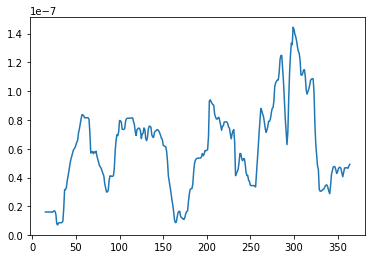

In [128]:
mp.plot(temporary_data[:365])

In [121]:
mfds

<xarray.Dataset>
Dimensions:                        (lat: 192, lon: 288, time: 656634)
Coordinates:
  * lat                            (lat) float64 -90.0 -89.06 ... 89.06 90.0
  * lon                            (lon) float64 0.0 1.25 2.5 ... 357.5 358.8
  * time                           (time) object 0402-01-02 00:00:00 ... 2201-01-01 00:00:00
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon) float32 dask.array<shape=(656634, 192, 288), chunksize=(35769, 192, 288)>

In [117]:
latlon_index_combos.__len__()

55296

In [ ]:
return_period = 200 # in years
#events_per_year = 151/40
events_per_year = 151

#return_period = 100
#events_per_year = 1

return_val_perc = 100*(1-1/(return_period*events_per_year))
print(return_val_perc)

In [ ]:
percentile_values = numpy.zeros((nlat,nlon))
for j in range(nlat):
    for k in range(nlon):
        # get rid of nans
        tmp_distro = prect_pic_seas_data[:,j,k]
        #prect_djf[:,j,k][~numpy.isnan(prect_djf[:,j,k])]
        percentile_values[j,k] = numpy.nanpercentile(tmp_distro, return_val_perc)

In [ ]:
# saveas info
file_prefix = 'LL_pic_daily_200yr_wet'
numpy.save('../intermediate-files/file_prefix' + '.npy', percentile_values)

In [10]:
filename_list = sorted(glob.glob(PRECT_root + 'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.*'))
saveas_dir = '/glade/scratch/baird/global-whiplash-files/'

for filename in filename_list[1:]:
    print()
    print(filename)
    example_pic_ds = xarray.open_dataset(filename)
    pic_prect_da = example_pic_ds['PRECT']
#     #pic_prect_da_rolling10sum = pic_prect_da.rolling(time=10, center=True).sum()
    pic_prect_da_rolling30sum = pic_prect_da.rolling(time=30, center=True).sum()
    saveas_filename = 'rolling_30day_sum_'+filename.split('.')[-8]+'_'+filename.split('.')[-2]+'.nc'
    pic_prect_da_rolling30sum.to_netcdf(saveas_dir+saveas_filename, unlimited_dims='time')
    print('+++++') 
    print('saved as',saveas_dir+saveas_filename)
    example_pic_ds.close()


/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/atm/proc/tseries/daily/PRECT/b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.05000101-05991231.nc
+++++
saved as /glade/scratch/baird/global-whiplash-files/rolling_30day_sum_B1850C5CN_05000101-05991231.nc

/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/atm/proc/tseries/daily/PRECT/b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.06000101-06991231.nc
+++++
saved as /glade/scratch/baird/global-whiplash-files/rolling_30day_sum_B1850C5CN_06000101-06991231.nc

/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/atm/proc/tseries/daily/PRECT/b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.07000101-07991231.nc
+++++
saved as /glade/scratch/baird/global-whiplash-files/rolling_30day_sum_B1850C5CN_07000101-07991231.nc

/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/atm/proc/tseries/daily/PRECT/b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.08000101-08991231.nc
+++++
saved as /glade/scratch/baird/global-whiplash-files/rolling_30day_sum_B1850C5CN_08000101-08991231

In [29]:
#prect_rcp = prect_rcp.where(prect_rcp>0.1, drop=True).values
prect_pic = prect_pic.where(prect_pic>0.1, other=0.0)

In [ ]:
prect0 = prect_pic.isel(time=0).values

In [26]:
prect0[prect0>=0.1]=numpy.nan

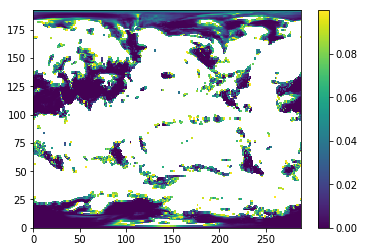

In [28]:
mp.pcolormesh(prect0);mp.colorbar()

set all <0.1 equal to zero (~15 seconds)

take rolling mean (~3 minutes)

In [16]:
window_size = 30
prect_pic_data_rolling30 = numpy.zeros((prect_pic.shape))
for j in range(lat.size):
    for k in range(lon.size):
        prect_pic_data_rolling30[:,j,k] = pandas.Series(prect_pic_data[:,j,k]).rolling(window=window_size).sum()

begin seasonal analysis

In [ ]:
prect_pic_seas_data = prect_pic_data[time_seas_indices,:,:]
prect_pic_seas_data_rolling30 = prect_pic_data_rolling30[time_seas_indices,:,:]

In [ ]:
time_datetime_seas = time_datetime[time_seas_indices]
nyears = time_datetime_seas[-1].year-time_datetime_seas[0].year+1

In [ ]:
nlat = lat.size
nlon = lon.size

In [11]:
151/30

5.033333333333333

In [ ]:
proj_map = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection=proj_map)
ax.coastlines(resolution='50m')
plot = ax.contourf(lon, lat, percentile_values)
mp.colorbar(plot)
ax.set_global()
#ax.set_extent([-130,-100,20,55])
#ax.set_extent([-150,-80,10,70])